## To start:
##### Make sure the following functions are imported into the current workspace.

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator as ml
import re

## Import desired datafile (must be in a csv) as a dataframe
##### Be sure that you know what column contains the desired mutation info and whether the mutation is in terms of base pair or codon/residue number.

In [2]:
df = pd.read_csv(r'/Users/tashajones/Desktop/MZW/Mutation landscapes/cBio muts/ALL 502 cBio muts.csv')

## Function that will give int characters numerical value

In [3]:
def glue(L):
    s = 0
    length = len(L) - 1
    for number in L:
        s += number * (10 ** length) # assigns value based on position (tens, thousands, etc.)
        length -= 1
    return s

## Function that will extract numbers from specified column of dataframe

In [4]:
def mut_extractor(self, df, column):
    num_list = []
    for entry in df[column]:  # row-wise, Get rows by using ['(column_name)']
        nums = ""
        for char in str(entry):  # makes sure entry is a string, and iterates through each character
            if char.isdigit():
                nums += char  # Collect all numbers in string by adding them to a string (if ...isdigit())
            elif (char.isdigit()==False) & ((len(nums)==3) or (len(nums)==4)):
                break # Ends loop early to prevent grabbing extra numbers that aren't associated with start of mutation
        if len(nums) > 4:
            nums = nums[:4] # Grab first 4 numbers only if the length of the string is >4 (accounts for insertion/deletions)
        #print(nums)
        num_list.append(nums)
    #print(num_list)

    # next 2 rows will make sure everything positions are kept in rows and have actual meaning (numerical value)
    a = [[int(c) for c in num_list[i]] for i in range(len(num_list))] # converts each character to an integer
    a = [glue(L) for L in a] # glues integers together
    #print(a)
    
    # Count how many times each mutation occurs
    max_chrom_num = -1
    for num in a:
        if num > max_chrom_num:
            max_chrom_num = num
    d = [0 for _ in range(max_chrom_num + 1)]
    memo_keys = []
    for key in a:
        if key not in memo_keys:
            memo_keys.append(key)
        d[key] += 1
    #print(memo_keys)
    #for key in num_list:
        #print(f"Chrom_num:{key} shows up {d[int(key)]} times")
        
    # Convert each entry in array to integers for use in histogram    
    num_array = np.zeros(len(num_list))
    for i in range(len(num_list)):
        num_array[i] = int(float(a[i])) # convert entry to integer
        
    return(num_array)

## Example of how to use df.apply to call mut_extractor()

In [5]:
muts_info_array = df.apply(mut_extractor, axis=1, args=(df, 'Protein Change')) # axis=1 ensures function goes row-by-row
muts_info_array = muts_info_array[0] # saves mutation info into a single dimension
#print(muts_info_array)

## Function that will find how many times each mutation occurs in the datafile
##### This is a raw representation of the same data used to generate the histogram in the following section.

In [6]:
def unique_mut_extractor(array):
    unique, counts = np.unique(array, return_counts=True) # finds all unique mutations and counts the # instances of each
    unique_muts = np.column_stack((unique,counts)) # stacks number of occurrences next to mutation identity
    return(unique_muts)
#unique_mut_extractor(muts_info_array)

## Plot mutations in a histogram
##### Here, you must know length of gene/protein and how many bins you want to have.
##### To plot multiple datafiles at once, simply copy and paste the plt.hist() line and change array/color/label.

#### Plot by frequency:

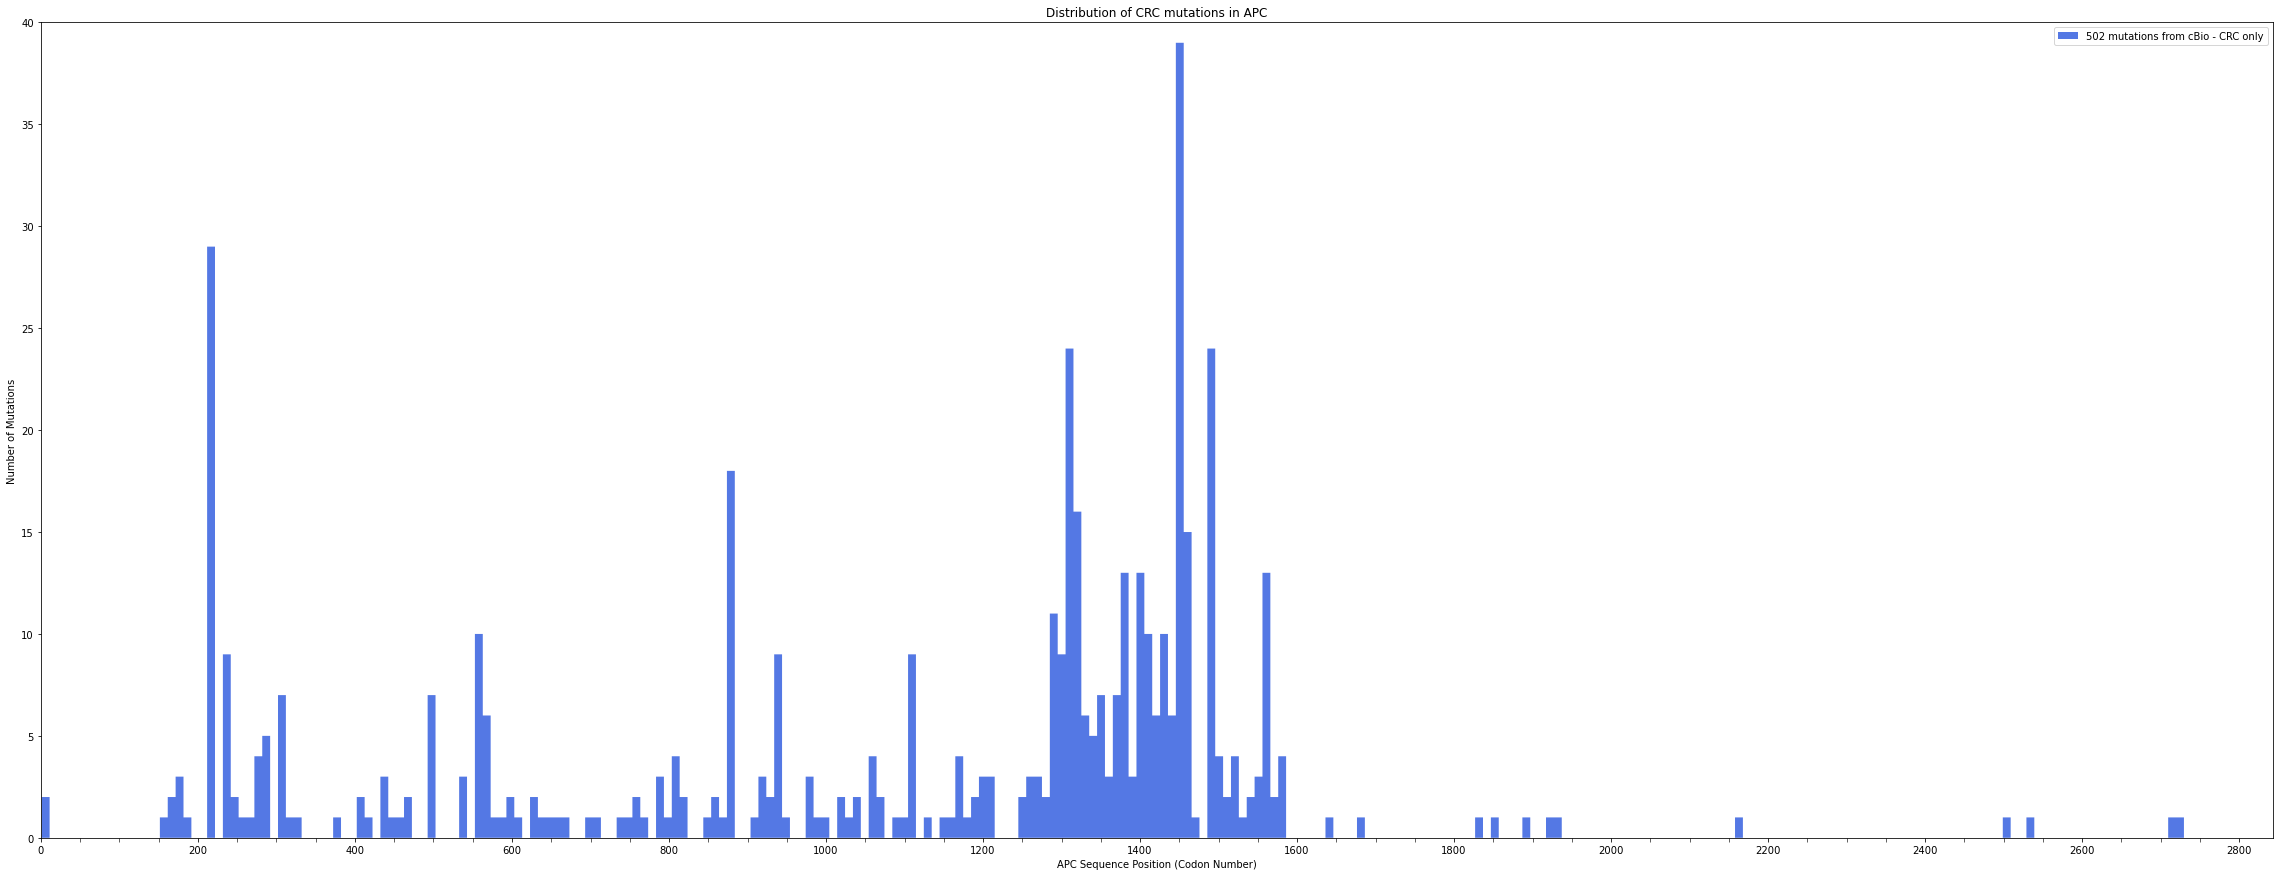

In [7]:
APC_protein_length = 2843
bins = np.linspace(1,2850,num=285) # creates a vector of 285 evenly spaced points to use as bin edges

plt.rcParams["figure.figsize"] = (40,15)


plt.hist(muts_info_array, alpha=0.9, bins=bins, histtype='stepfilled', color='royalblue', label='502 mutations from cBio - CRC only')

plt.legend(loc='upper right')
plt.xlabel('APC Sequence Position (Codon Number)')
plt.ylabel('Number of Mutations')
plt.title('Distribution of CRC mutations in APC')
plt.ylim(0,40)
plt.xlim(0,APC_protein_length) # sets histogram x-axis to size of protein specified above

x = np.array([i*200 for i in range(15)])
plt.xticks(x) # will plot a numerical marker along the x-axis every 200 residues
ax = plt.gca()
ax.xaxis.set_minor_locator(ml(50)) # will plot a small tick every 50 residues
ax.tick_params(which='minor', length=4)

#plt.savefig("APC mut hist frequency.pdf", dpi=300, bbox_inches='tight')

plt.show()

#### Plot by percentage:

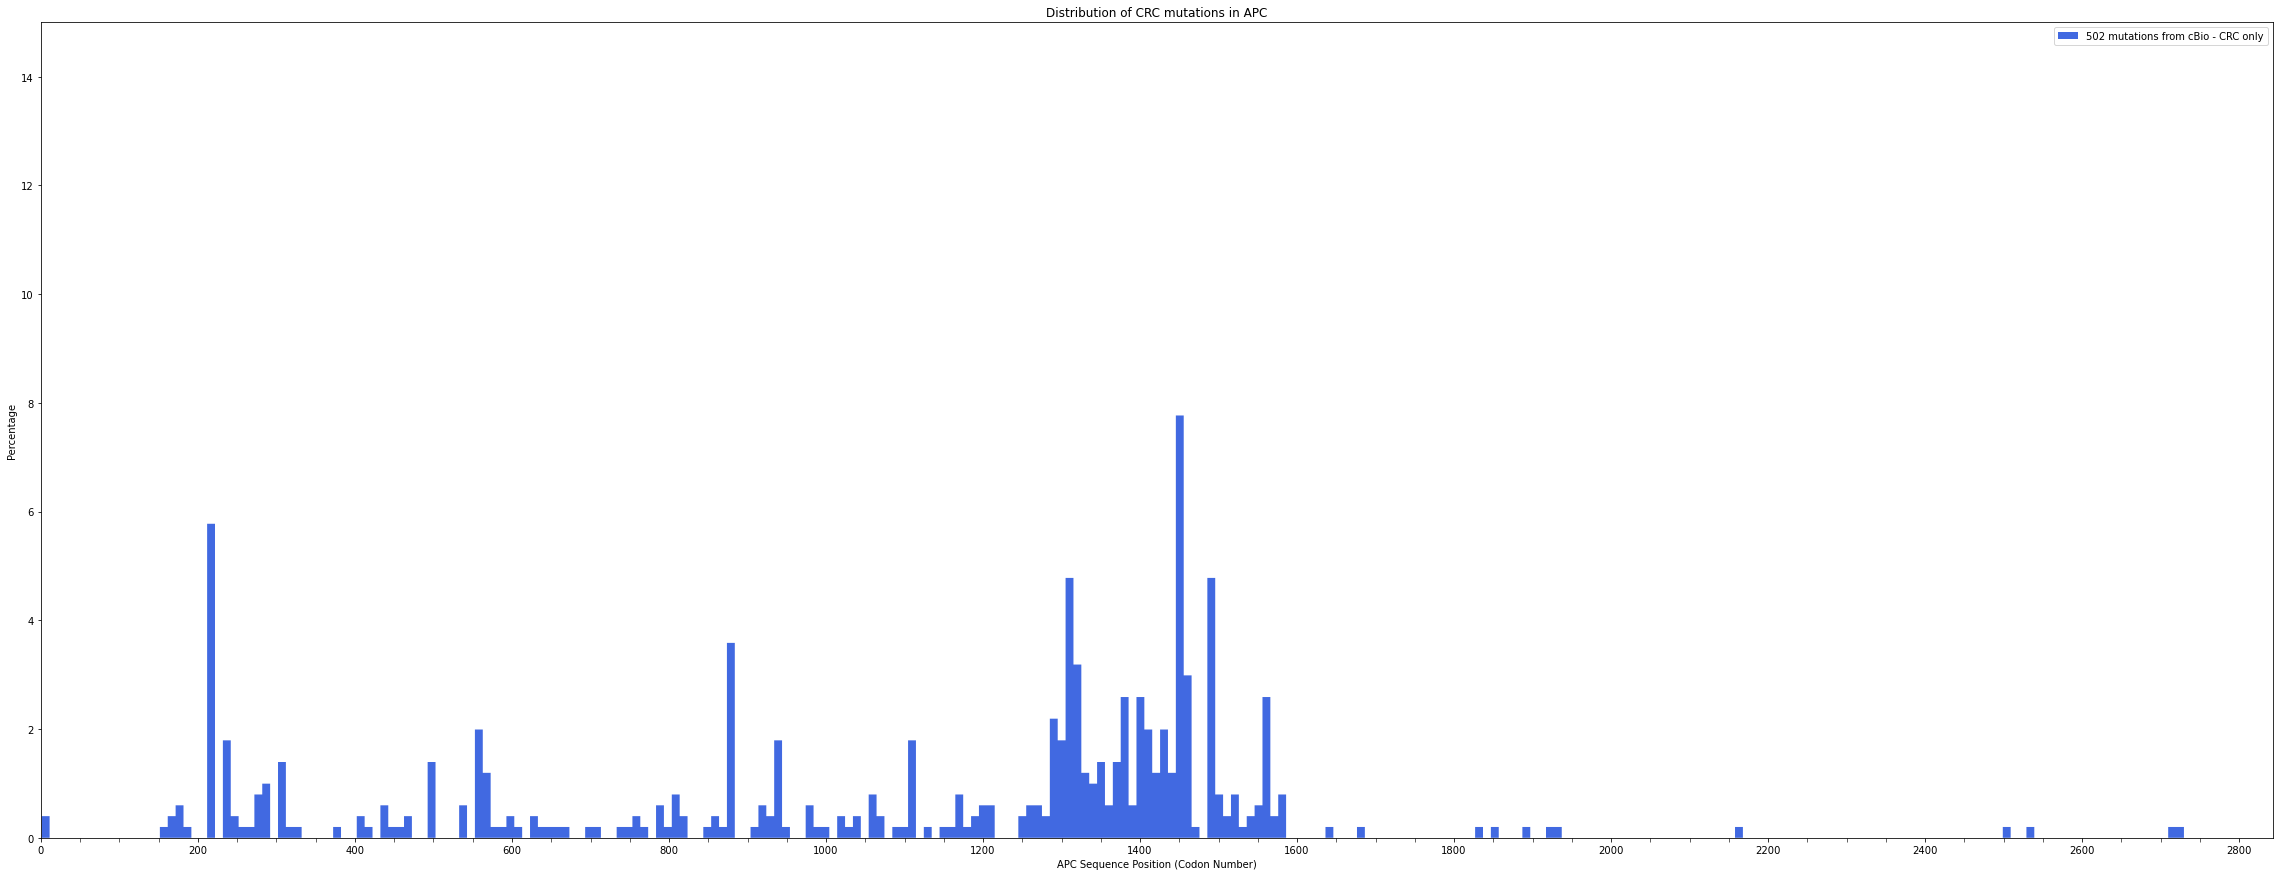

In [8]:
APC_protein_length = 2843
bins = np.linspace(1,2850,num=285)

plt.rcParams["figure.figsize"] = (40,15)

ones = np.ones(len(muts_info_array))
weights = ones/len(muts_info_array) * 100

plt.hist(muts_info_array, bins=bins, stacked=True, histtype='stepfilled', color=['royalblue'],
         label=['502 mutations from cBio - CRC only'], weights=[weights])

plt.legend(loc='upper right')
plt.xlabel('APC Sequence Position (Codon Number)')
plt.ylabel('Percentage')
plt.title('Distribution of CRC mutations in APC')
plt.ylim(0,15)

plt.xlim(0,APC_protein_length)
x = np.array([i*200 for i in range(15)])      
plt.xticks(x)
ax = plt.gca()
ax.xaxis.set_minor_locator(ml(50))
ax.tick_params(which='minor', length=4)

#plt.savefig("APC mut hist percentage.pdf", dpi=300, bbox_inches='tight')

plt.show()